In [2]:
import numpy as np # Linear Algebra
import pandas as pd # DataFrame
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV #hyperparemeter tuning
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/ds-mahbub/24MLE01_Machine-Learning-Engineer/KNN/Classification/data/music_clean.csv")
df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [4]:
print(df.isna().sum())

print('...................')

print(f'Duplicate Value: {df.duplicated().sum()}')

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64
...................
Duplicate Value: 0


In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# Statistical Analysis

In [7]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,51.660000,0.258649,0.542602,2.172204e+05,0.636464,0.137289,0.199993,-8.253305,0.077879,120.368400,0.480057,0.50000
std,14.028585,0.307494,0.160322,1.175582e+05,0.237789,0.285558,0.160435,5.158523,0.089451,28.942130,0.237854,0.50025
min,0.000000,0.000003,0.062400,-1.000000e+00,0.002510,0.000000,0.025400,-38.718000,0.023400,56.855000,0.029800,0.00000
25%,43.750000,0.013275,0.444000,1.806562e+05,0.485750,0.000000,0.100000,-9.775500,0.033100,95.909750,0.306500,0.00000
50%,54.000000,0.116000,0.548500,2.163000e+05,0.676500,0.000089,0.131000,-6.855000,0.043600,119.952961,0.473500,0.50000
75%,62.000000,0.426500,0.657000,2.605025e+05,0.822500,0.042825,0.273250,-4.977750,0.074950,140.033000,0.654000,1.00000
max,82.000000,0.996000,0.950000,1.617333e+06,0.995000,0.975000,0.991000,-0.883000,0.710000,207.852000,0.968000,1.00000


In [8]:
df.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'genre'],
      dtype='object')

In [9]:
# check correlation

corr = df[['popularity', 'acousticness', 'danceability', 'duration_ms','energy','instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
'valence', 'genre']].corr()['genre'].sort_values(ascending=False)

corr = corr.to_frame()
corr.style.background_gradient(cmap='RdYlBu')

,genre
genre,1.000000
popularity,0.571548
loudness,0.213062
energy,0.186644
valence,0.114406
tempo,0.079538
danceability,-0.029817
liveness,-0.038217
duration_ms,-0.062171
acousticness,-0.194291


<Axes: >

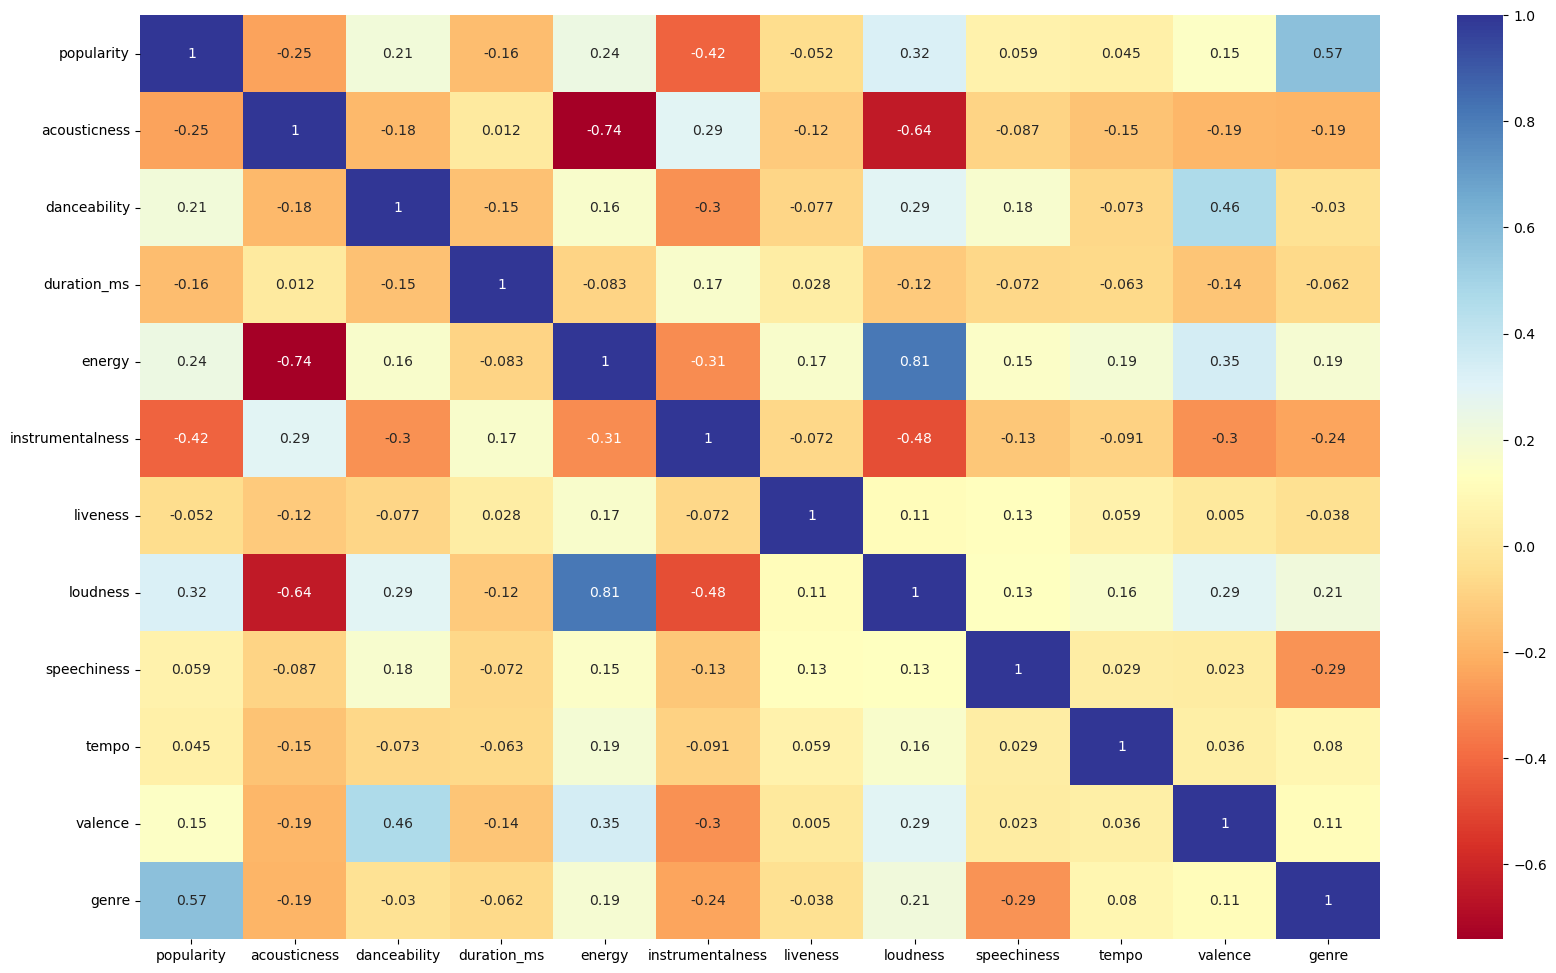

In [10]:
# Heatmap

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')

In [11]:
# Data Preprocessing

X = df.drop('genre', axis = 1) # after dropping we have features
y = df['genre']


In [12]:
# feature importance

feature_selection = ExtraTreesClassifier()
feature_selection.fit(X, y)

ExtraTreesClassifier()

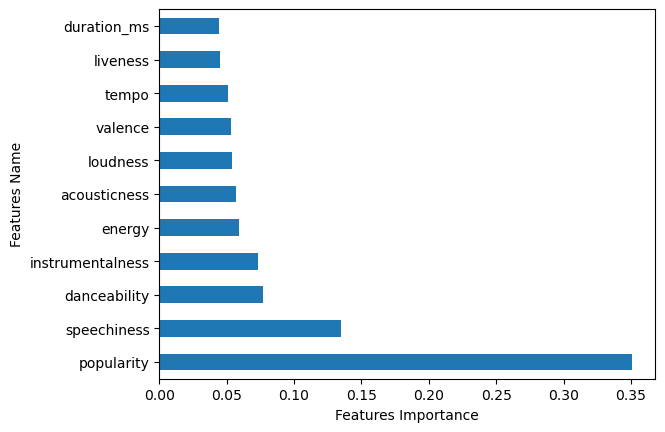

In [13]:
feature_importance = pd.Series(feature_selection.feature_importances_, index=X.columns)
feature_importance.nlargest(len(df.columns)).plot(kind='barh')
plt.xlabel("Features Importance")
plt.ylabel("Features Name")
plt.show()

In [14]:
feature_importance.sort_values(ascending=False)

popularity          0.350512
speechiness         0.135191
danceability        0.076896
instrumentalness    0.073558
energy              0.059497
acousticness        0.057168
loudness            0.054100
valence             0.052855
tempo               0.051357
liveness            0.044722
duration_ms         0.044144
dtype: float64

In [15]:
X = df[feature_importance[:6].index] #features
y = df['genre']

X

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness
0,60.0,0.896000,0.726,214547.0,0.1770,0.000002
1,63.0,0.003840,0.635,190448.0,0.9080,0.083400
2,59.0,0.000075,0.352,456320.0,0.9560,0.020300
3,54.0,0.945000,0.488,352280.0,0.3260,0.015700
4,55.0,0.245000,0.667,273693.0,0.6470,0.000297
...,...,...,...,...,...,...
995,57.0,0.972000,0.193,208040.0,0.0329,0.929000
996,56.0,0.005790,0.939,144453.0,0.3730,0.000000
997,54.0,0.016100,0.739,238339.0,0.5390,0.000000
998,62.0,0.326000,0.515,286707.0,0.5050,0.000000


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
knn.score(X_train, y_train)

0.69375

In [18]:
knn.score(X_test, y_test)

0.535

In [19]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.63      0.59       104
           1       0.52      0.43      0.47        96

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.53      0.54      0.53       200



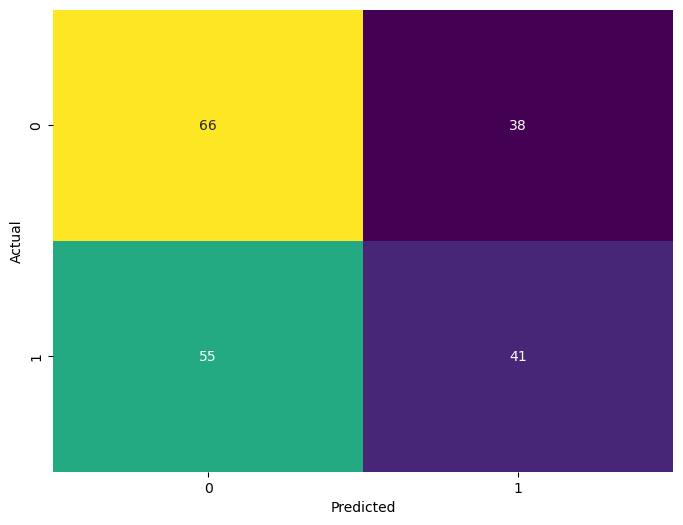

In [20]:
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[66 38]
 [55 41]]


In [22]:
TP = 41
FP = 38
TN = 66
FN = 55

precision = TP/(TP+FP)

recall = TP/(TP+FN)

f1_score = 2*(precision*recall)/(precision+recall)

print(precision)
print(recall)
print(f1_score)

0.5189873417721519
0.4270833333333333
0.4685714285714285


In [23]:
# choosing optimum k

neighbors = np.arange(3, 35)

train_accuracy = {}
test_accuracy = {}

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    
    train_accuracy[n] = knn.score(X_train, y_train)
    test_accuracy[n] = knn.score(X_test, y_test)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)


Train Accuracy:  {3: 0.7725, 4: 0.705, 5: 0.69375, 6: 0.68875, 7: 0.67125, 8: 0.665, 9: 0.67125, 10: 0.665, 11: 0.66125, 12: 0.6625, 13: 0.6575, 14: 0.65875, 15: 0.6425, 16: 0.64625, 17: 0.645, 18: 0.63375, 19: 0.64625, 20: 0.64, 21: 0.63875, 22: 0.62125, 23: 0.64, 24: 0.62625, 25: 0.62, 26: 0.6225, 27: 0.61625, 28: 0.61125, 29: 0.61625, 30: 0.61625, 31: 0.6275, 32: 0.62375, 33: 0.635, 34: 0.63}
Test Accuracy:  {3: 0.49, 4: 0.51, 5: 0.535, 6: 0.505, 7: 0.535, 8: 0.52, 9: 0.53, 10: 0.56, 11: 0.555, 12: 0.545, 13: 0.555, 14: 0.545, 15: 0.545, 16: 0.53, 17: 0.545, 18: 0.535, 19: 0.56, 20: 0.55, 21: 0.565, 22: 0.565, 23: 0.58, 24: 0.57, 25: 0.58, 26: 0.575, 27: 0.6, 28: 0.595, 29: 0.615, 30: 0.6, 31: 0.595, 32: 0.6, 33: 0.625, 34: 0.61}


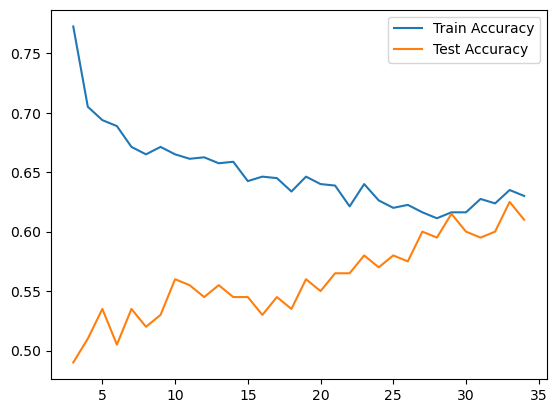

In [24]:
plt.plot(neighbors, train_accuracy.values(), label = "Train Accuracy")
plt.plot(neighbors, test_accuracy.values(), label = 'Test Accuracy')
plt.legend()
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)

# knn.score(X_train, y_train)
# knn.score(X_test, y_test)

KNeighborsClassifier(n_neighbors=29)

In [26]:
knn.score(X_train, y_train)

0.61625

In [27]:
knn.score(X_test, y_test)

0.615

In [28]:
# Hyperparameter Tuning with GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidian', 'manhattan']
    }

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
print(best_param)

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


In [29]:
knn = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 15, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [30]:
knn.score(X_train, y_train)

0.64375

In [31]:
knn.score(X_test, y_test)

0.55

In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print("Training Accuray: ", dt.score(X_train, y_train))
print("Test Accuray: ", dt.score(X_test, y_test))

Training Accuray:  1.0
Test Accuray:  0.75


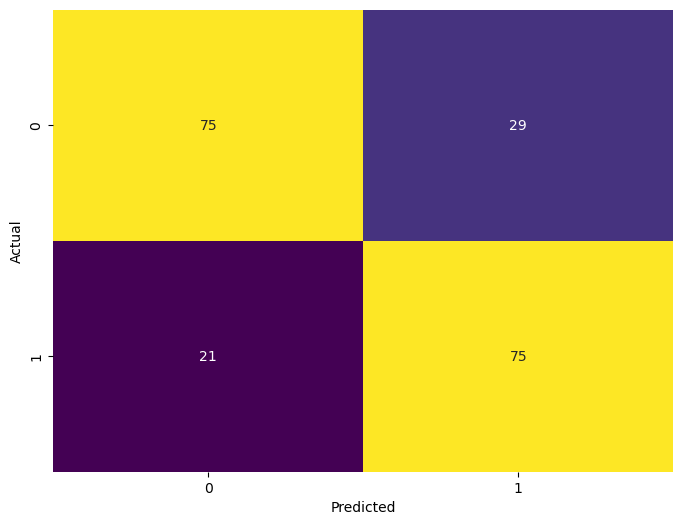

In [33]:
y_pred = dt.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [38]:
# Hyperparameter Tuning with GridSearchCV

param_grid = {
    'max_depth': [2, 5, 7, None],
    'min_samples_split': [2, 5, 10, 12],
    'min_samples_leaf': [1, 2, 3, 4]
    }

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
print(best_param)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [35]:
dt = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 2, min_samples_split= 10)
dt.fit(X_train, y_train)

print("Training Accuray: ", dt.score(X_train, y_train))
print("Test Accuray: ", dt.score(X_test, y_test))

Training Accuray:  0.87625
Test Accuray:  0.77


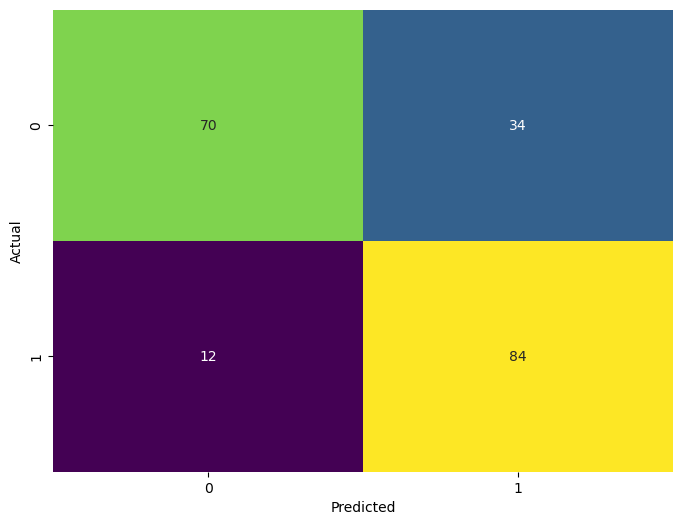

In [36]:
y_pred = dt.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
()